c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\raksh\AppData\Local\Temp\ipykernel_25208\1832690422.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Classes")


Test Accuracy: nan%
Validation Accuracy: nan%


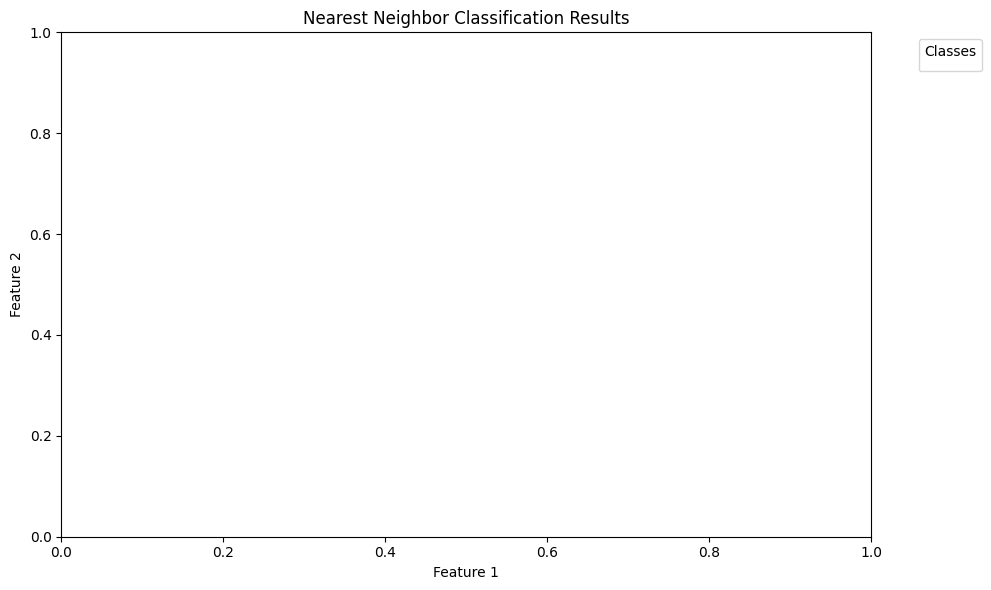

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
import glob
import matplotlib.pyplot as plt

# Function to load data from txt files where filename represents the class label
def load_data_from_files(file_pattern):
    data = []
    labels = []
    for file_path in glob.glob(file_pattern):
        class_label = file_path.split('/')[-1].replace('.txt', '')  # Get class name from file name
        with open(file_path, 'r') as file:
            for line in file:
                features = list(map(float, line.strip().split()))  # Space-separated features
                data.append(features)
                labels.append(class_label)
    return np.array(data), np.array(labels)
    
# Nearest Neighbor Classifier
def nearest_neighbor_classifier(train_data, train_labels, test_data):
    predictions = []
    for test_point in test_data:
        # Calculate Euclidean distance from test point to all training points
        distances = np.linalg.norm(train_data - test_point, axis=1)
        # Find the nearest neighbor (smallest distance)
        nearest_neighbor_index = np.argmin(distances)
        # Get the class of the nearest neighbor
        predicted_class = train_labels[nearest_neighbor_index]
        predictions.append(predicted_class)
    return np.array(predictions)

# Load train, test, and validation datasets (update file patterns as needed)
train_data, train_labels = load_data_from_files('classification_datasets\linearlySeparable\class1_train.txt')
test_data, test_labels = load_data_from_files('classification_datasets\linearlySeparable\class1_test.txt')
val_data, val_labels = load_data_from_files('classification_datasets\linearlySeparable\class1_val.txt')

# Predict on test and validation sets
test_predictions = nearest_neighbor_classifier(train_data, train_labels, test_data)
val_predictions = nearest_neighbor_classifier(train_data, train_labels, val_data)

# Calculate accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
val_accuracy = accuracy_score(val_labels, val_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plotting the results
def plot_data(train_data, train_labels, test_data, test_labels, test_predictions, val_data, val_labels, val_predictions):
    plt.figure(figsize=(10, 6))

    # Colors for each class
    classes = np.unique(train_labels)
    colors = ['r', 'g', 'b', 'c']
    color_map = dict(zip(classes, colors))

    # Plot training data
    for class_label in classes:
        plt.scatter(train_data[train_labels == class_label][:, 0],
                    train_data[train_labels == class_label][:, 1],
                    c=color_map[class_label], marker='o', label=f'Train - {class_label}', edgecolor='k', s=50)

    # Plot test data with predictions
    for class_label in classes:
        plt.scatter(test_data[test_labels == class_label][:, 0],
                    test_data[test_labels == class_label][:, 1],
                    c=color_map[class_label], marker='x', label=f'Test - True {class_label}', s=50, alpha=0.7)
        plt.scatter(test_data[test_predictions == class_label][:, 0],
                    test_data[test_predictions == class_label][:, 1],
                    c=color_map[class_label], marker='^', label=f'Test - Pred {class_label}', s=50, alpha=0.7)

    # Plot validation data with predictions
    for class_label in classes:
        plt.scatter(val_data[val_labels == class_label][:, 0],
                    val_data[val_labels == class_label][:, 1],
                    c=color_map[class_label], marker='+', label=f'Val - True {class_label}', s=50, alpha=0.7)
        plt.scatter(val_data[val_predictions == class_label][:, 0],
                    val_data[val_predictions == class_label][:, 1],
                    c=color_map[class_label], marker='s', label=f'Val - Pred {class_label}', s=50, alpha=0.7)

    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Classes")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Nearest Neighbor Classification Results")
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_data(train_data, train_labels, test_data, test_labels, test_predictions, val_data, val_labels, val_predictions)
